In [1]:
# 
"""

BASED ON RESP_Demo_test_automap_stability.py

This script searches for a perturbation to simulate worst-case effect for the
AUTOMAP network. The result is saved as a Runner object. Make sure you have
updated the automap_config.py file before running this script.
"""
import time
import tensorflow as tf;
import scipy.io;
import h5py
from os.path import join;
import os;
import os.path;
import _2fc_2cnv_1dcv_L1sparse_64x64_tanhrelu_upg as arch
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np;
from adv_tools_PNAS.automap_config import src_weights, src_data;
import pandas as pd
# from adv_tools_PNAS.automap_tools import read_automap_k_space_mask, compile_network, hand_f, hand_dQ, load_runner;
from adv_tools_PNAS.RESP_automap_tools import read_automap_k_space_mask, compile_network, RESP_hand_f, hand_dQ, load_runner;

from adv_tools_PNAS.adversarial_tools import scale_to_01
# from adv_tools_PNAS.Runner import Runner;
# from adv_tools_PNAS.Automap_Runner import Automap_Runner;

from adv_tools_PNAS.RESP_Runner import Runner;
from adv_tools_PNAS.RESP_Automap_Runner import Automap_Runner;


from PIL import Image

HCP_nbr = 1033
im_nbr = 2

# Parameters to the worst case perturbation algorithm. 
stab_eta = 0.001
stab_lambda = 0.1
stab_gamma = 0.9
stab_tau = 1e-5

k_mask_idx1, k_mask_idx2 = read_automap_k_space_mask();

data = scipy.io.loadmat(join(src_data, f'HCP_mgh_{HCP_nbr}_T2_subset_N_128.mat'));
mri_data = data['im'];

batch_size = mri_data.shape[0];




/home/lfi/anaconda3/envs/danyal_tf114/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lfi/anaconda3/envs/danyal_tf114/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lfi/anaconda3/envs/danyal_tf114/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lfi/anaconda3/envs/danyal_tf114

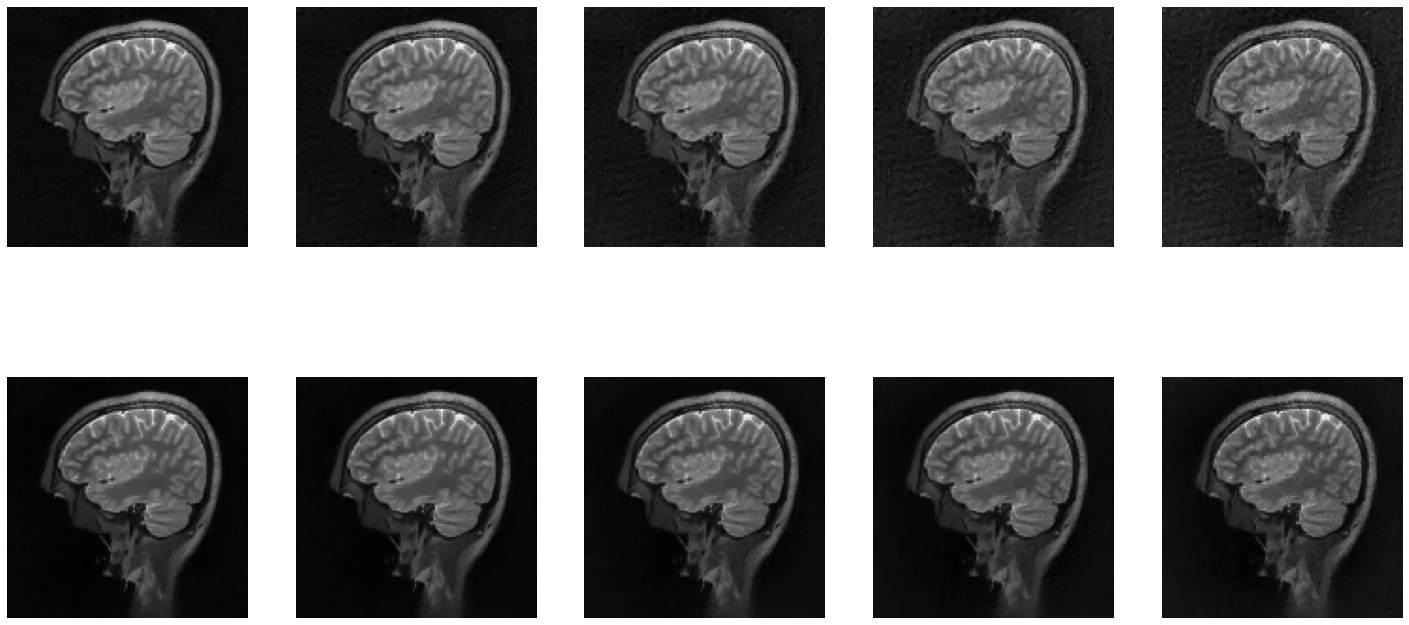

In [3]:
# FIGURE 2

orig_amap_recons = np.load(join(src_data,'NMARESP_orig_automap_advpert_fxr_array.npy'))
aug_amap_recons = np.load(join(src_data,'NMARESP_aug_automap_advpert_fxr_array.npy'))


num_imgs = 5
offset = 1

fig, axs = plt.subplots(2, 5,figsize=(20*1.25,10*1.25))

for i in range(num_imgs):


    # r_value = offset+i

    axs[0,i].imshow(orig_amap_recons[i+offset,:,:],cmap='gray')
    axs[1,i].imshow(aug_amap_recons[i+offset,:,:],cmap='gray')
    
    axs[0,i].axis('off')
    axs[1,i].axis('off')


    # plt.imshow(np.real(adv_noise_complex[r_value,:,:]),cmap='gray')
    # plt.colorbar()

# timesfont = {'fontname':'Times New Roman'}
timesfont = {'fontfamily':'serif'}
hfont = {'fontname':'Helvetica'}

# axs[0,0].set_title('real($wgn$)',fontsize=14)
# axs[0,1].set_title('real($r_1$)',fontsize=14)
# axs[0,2].set_title('real($r_2$)',fontsize=14)
# axs[0,3].set_title('real($r_3$)',fontsize=14)

# axs[1,0].set_title('imag($wgn$)',fontsize=14)
# axs[1,1].set_title('imag($r_1$)',fontsize=14)
# axs[1,2].set_title('imag($r_2$)',fontsize=14)
# axs[1,3].set_title('imag($r_3$)',fontsize=14)
